# Salsa al Parque - Solución

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Parámetro binario, Variable Binaria, Scheduling</i>

In [1]:
import os
# Por precaución, cambiamos el directorio activo de Python a aquel que contenga este notebook
if "optimizacion" in os.listdir():
    os.chdir(r"optimizacion/Formulaciones/8. Salsa al parque/")

## Enunciado

<!--  
Conjuntos: $Conjunto$
Indices: $indice \in Conjunto$
Parámetros/variables: $parametro_{ij}$
Tablas: En HTML y los textos de elementos del conjunto en la parte izquierda con alineado a la izquierda. Además a cada tabla se le pone un nombre y su respectiva descripción.
-->

El comité organizador del festival *Salsa al Parque* te ha contratado para definir el horario en el que se presentará cada uno de los cinco artistas principales. El comité le ha indicado que los artistas deben ser asignados a lo largo de una franja de 12 horas. En particular, hay un conjunto $A$ de artistas y un conjunto $H$ de horas. Salsa al Parque ha pronosticado la audiencia $a_{it}$ que tendría cada uno de los  artistas $i\in A$ en caso de presentarse en cada hora $t \in T$. Además, el comité estableció la duración $d_{i}$ (horas) que debe tener la presentación de cada uno de estos artistas $i\in A$. Para generar la planeación se definió la variable binaria $x_{it}$ la cual toma el valor de uno si el artista $i \in A$ inicia la presentación en la hora $t \in H$ y cero de lo contrario. También, se decidió sobre la variable $y_{it}$, la cual toma el valor de uno si el artista $i \in A$ se presenta durante la hora $t \in H$ y cero de lo contrario.

Debido a la importancia de cada uno de estos artistas, el comité enfatizó que todos los artistas se deben presentar una sola vez y que en cada hora se pueden presentar máximo dos artistas en simultaneo. Con el fin de propiciar presentaciones de calidad, el comité organizador te solicitó garantizar que cada artista realiza su presentación completa en horas consecutivas. El comité ha pedido definir las horas en las que se presentará cada artista de manera que se maximice la audiencia total. La Tabla 1 presenta la duración de la presentación y la audiencia esperada en cada hora para cada uno de los artistas.

<p style="text-align: center;"><b>Tabla 1. Audiencia esperada para cada artista en cada horario</b></p>

<table class="colwidths-auto table">
<thead>
  <tr class="row-odd">
    <th colspan="2" rowspan="2" class="text-align:center head"></th>
    <th colspan="12" class="text-align:center head">Audiencia (miles de personas)</th>
  </tr>
  <tr class="row-even">
    <th colspan="12" class="text-align:center head">Hora</th>
  </tr>
</thead>
<tbody>
  <tr class="row-odd">
    <th class="text-align:center head">Artista</th>
    <th class="text-align:center head">Duración Presentación (horas)</th>
    <td class="text-align:center">1</td>
    <td class="text-align:center">2</td>
    <td class="text-align:center">3</td>
    <td class="text-align:center">4</td>
    <td class="text-align:center">5</td>
    <td class="text-align:center">6</td>
    <td class="text-align:center">7</td>
    <td class="text-align:center">8</td>
    <td class="text-align:center">9</td>
    <td class="text-align:center">10</td>
    <td class="text-align:center">11</td>
    <td class="text-align:center">12<br></td>
  </tr>
  <tr class="row-even">
    <td class="text-align:center">1</td>
    <td class="text-align:center">2</td>
    <td class="text-align:center">1197</td>
    <td class="text-align:center">2578</td>
    <td class="text-align:center">1350</td>
    <td class="text-align:center">2729</td>
    <td class="text-align:center">2679</td>
    <td class="text-align:center">2946</td>
    <td class="text-align:center">1563</td>
    <td class="text-align:center">2998</td>
    <td class="text-align:center">2879</td>
    <td class="text-align:center">1126</td>
    <td class="text-align:center">2559</td>
    <td class="text-align:center">1129</td>
  </tr>
  <tr class="row-odd">
    <td class="text-align:center">2</td>
    <td class="text-align:center">3</td>
    <td class="text-align:center">1034</td>
    <td class="text-align:center">2009</td>
    <td class="text-align:center">1515</td>
    <td class="text-align:center">2254</td>
    <td class="text-align:center">1624</td>
    <td class="text-align:center">1277</td>
    <td class="text-align:center">2010</td>
    <td class="text-align:center">2563</td>
    <td class="text-align:center">1384</td>
    <td class="text-align:center">2695</td>
    <td class="text-align:center">2053</td>
    <td class="text-align:center">2585</td>
  </tr>
  <tr class="row-even">
    <td class="text-align:center">3</td>
    <td class="text-align:center">2</td>
    <td class="text-align:center">1058</td>
    <td class="text-align:center">1842</td>
    <td class="text-align:center">1443</td>
    <td class="text-align:center">1995</td>
    <td class="text-align:center">2819</td>
    <td class="text-align:center">1998</td>
    <td class="text-align:center">1401</td>
    <td class="text-align:center">1708</td>
    <td class="text-align:center">1346</td>
    <td class="text-align:center">1674</td>
    <td class="text-align:center">1816</td>
    <td class="text-align:center">1032</td>
  </tr>
  <tr class="row-odd">
    <td class="text-align:center">4</td>
    <td class="text-align:center">3</td>
    <td class="text-align:center">1082</td>
    <td class="text-align:center">1206</td>
    <td class="text-align:center">2366</td>
    <td class="text-align:center">1013</td>
    <td class="text-align:center">2762</td>
    <td class="text-align:center">1479</td>
    <td class="text-align:center">2496</td>
    <td class="text-align:center">1509</td>
    <td class="text-align:center">1673</td>
    <td class="text-align:center">1350</td>
    <td class="text-align:center">1128</td>
    <td class="text-align:center">2669</td>
  </tr>
  <tr class="row-even">
    <td class="text-align:center">5</td>
    <td class="text-align:center">2</td>
    <td class="text-align:center">2801</td>
    <td class="text-align:center">1003</td>
    <td class="text-align:center">2965</td>
    <td class="text-align:center">2295</td>
    <td class="text-align:center">1147</td>
    <td class="text-align:center">2156</td>
    <td class="text-align:center">1058</td>
    <td class="text-align:center">2857</td>
    <td class="text-align:center">1968</td>
    <td class="text-align:center">2764</td>
    <td class="text-align:center">2153</td>
    <td class="text-align:center">1518</td>
  </tr>
</tbody>
</table>

La siguiente tabla presenta una solución factible, aunque subóptima, para la situación planteada anteriormente:

<p style="text-align: center;"><b>Tabla 1. Configuración factible de los itinerarios.</b></p>

<table class="colwidths-auto table">
<thead>
  <tr class="row-odd">
    <th class="text-align:center head"></th>
    <th colspan="12" class="text-align:center head">Hora</th>
  </tr>
</thead>
<tbody>
  <tr class="row-even">
    <th class="text-align:center head">Artista</th>
    <td class="text-align:center">1</td>
    <td class="text-align:center">2</td>
    <td class="text-align:center">3</td>
    <td class="text-align:center">4</td>
    <td class="text-align:center">5</td>
    <td class="text-align:center">6</td>
    <td class="text-align:center">7</td>
    <td class="text-align:center">8</td>
    <td class="text-align:center">9</td>
    <td class="text-align:center">10</td>
    <td class="text-align:center">11</td>
    <td class="text-align:center">12<br></td>
  </tr>
  <tr class="row-odd">
    <td class="text-align:center">1</td>
    <td class="text-align:center"></td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
  </tr>
  <tr class="row-even">
    <td class="text-align:center">2</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
  </tr>
  <tr class="row-odd">
    <td class="text-align:center">3</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
  </tr>
  <tr class="row-even">
    <td class="text-align:center">4</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
  </tr>
  <tr class="row-odd">
    <td class="text-align:center">5</td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center"></td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center">✓</td>
    <td class="text-align:center"></td>
  </tr>
</tbody>
</table>

## Formulación

<!--  
Enumeración alfabetica y en negrilla. En caso de que hayan subliterales, estos van identados, en negrilla y se utiliza "i.", "ii.", ... 
Ejemplo:
**a.**
    **i.**
    **ii.**
**b.**
-->

**a.** Formula matemáticamente un modelo de optimización de forma general que represente la
situación anterior. Defina clara y rigurosamente:  
- Conjuntos
- Parámetros
- Variables de decisión
- Restricciones
- Naturaleza de las variables
- Función objetivo

### Conjuntos

* $A$: artistas
* $H$: horas

### Parámetros

* $d_{i}$: duración de la presentación del artista $i\in A$
* $a_{it}$: audiencia del artista $i\in A$ durante la hora $t\in H$

### Variables de decisión

* $x_{it}:\begin{cases}1\text{,}&\text{ si el artista }i\in A\text{ inicia su presentación en la hora }t\in H \\ 0\text{,}& \text{ d.l.c.}  \end{cases}$
* $y_{it}:\begin{cases}1\text{,}&\text{ si el artista }i\in A\text{ se presenta durante la hora }t\in H \\ 0\text{,}& \text{ d.l.c.}  \end{cases}$

### Restricciones

Se garantiza que la cantidad de artistas presentandose en simultaneo a cada hora $h \in H$ sea menor o igual a $k$:

$$
    \sum_{i \in A}y_{i,t} \leq k,\ \forall t \in H;
$$

Se garantiza que cada artista $i \in A$ inicie su presentación una única vez:

$$
    \sum_{t \in H}x_{i,t} = 1,\ \forall i \in A;
$$

Se garantiza que cada artista $i \in A$ se presenta en horas consecutivas y no presenta durante horas previas a la hora de inicio.

- El artista $i \in A$ se presenta en horas consecutivas desde el inicio de su presentación:

$$
    \sum_{j = t}^{t+d_{i}-1}y_{i,j} \geq d_{i}x_{i,t},\ \forall i \in A, t \in H \ \vert\  t + d(i) - 1 \leq |H|;
$$

- El artista $i \in A$ se presenta exactamente las horas que dura su presentación:

$$
    \sum_{t \in H}y_{i,t} = d_{i},\ \forall i \in A;
$$

- El artista $i \in A$ no puede iniciar su presentación si el tiempo restante es insuficiente:

$$
    x_{i,t} = 0,\ \forall i \in A, t \in H \ \vert \ t + d_{i} - 1 > |H|;
$$

### Naturaleza de las Variables

En cualquier instante $t \in H$ un artista $i\in A$ puede o no iniciar su presentación y puede o no estarse presentando.

$$
    x_{it}, y_{it} \in \{0,1\},\ \forall i \in A, t \in H;
$$

### Función objetivo

Se debe maximizar la audiencia total alcanzada.

$$
    \operatorname{máx}\ \sum_{i \in A} \sum_{t \in H} a_{it}y_{it}
$$

## Implementación

**b.** Resuelve el modelo planteado utilizando la librería de PuLP en Python. ¿Cuál es la solución óptima del problema? 

### Librerías

Importa el módulo `matplotlib.pyplot` para crear gráficas y la librería `pulp` para crear y resolver el modelo.

In [17]:
import matplotlib.pyplot as plt
import pulp as lp

### Conjuntos

Define los conjuntos `A` y `H` que representan respectivamente los artistas y las horas.

Recuerda que por conveniencia de preservar el orden de los elementos de los conjuntos, no siempre deberás definirlos con el tipo `set`.

In [3]:
# Artistas
A = [f"A_{i}" for i in range(1, 6)]

# Horas
H = list(range(1, 13))

### Parámetros

Define o importa los parámetros del modelo.

In [4]:
# Duración de la presentación de cada artista
d = {"A_1": 2, "A_2": 3, "A_3": 2, "A_4": 3, "A_5": 2}

# Audiencia de cada artista en cada hora
a = {
    ("A_1", 1): 1197,
    ("A_1", 2): 2578,
    ("A_1", 3): 1350,
    ("A_1", 4): 2729,
    ("A_1", 5): 2679,
    ("A_1", 6): 2946,
    ("A_1", 7): 1563,
    ("A_1", 8): 2998,
    ("A_1", 9): 2879,
    ("A_1", 10): 1126,
    ("A_1", 11): 2559,
    ("A_1", 12): 1129,
    ("A_2", 1): 1034,
    ("A_2", 2): 2009,
    ("A_2", 3): 1515,
    ("A_2", 4): 2254,
    ("A_2", 5): 1624,
    ("A_2", 6): 1277,
    ("A_2", 7): 2010,
    ("A_2", 8): 2563,
    ("A_2", 9): 1384,
    ("A_2", 10): 2695,
    ("A_2", 11): 2053,
    ("A_2", 12): 2585,
    ("A_3", 1): 1058,
    ("A_3", 2): 1842,
    ("A_3", 3): 1443,
    ("A_3", 4): 1995,
    ("A_3", 5): 2819,
    ("A_3", 6): 1998,
    ("A_3", 7): 1401,
    ("A_3", 8): 1708,
    ("A_3", 9): 1346,
    ("A_3", 10): 1674,
    ("A_3", 11): 1816,
    ("A_3", 12): 1032,
    ("A_4", 1): 1082,
    ("A_4", 2): 1206,
    ("A_4", 3): 2366,
    ("A_4", 4): 1013,
    ("A_4", 5): 2762,
    ("A_4", 6): 1479,
    ("A_4", 7): 2496,
    ("A_4", 8): 1509,
    ("A_4", 9): 1673,
    ("A_4", 10): 1350,
    ("A_4", 11): 1128,
    ("A_4", 12): 2669,
    ("A_5", 1): 2801,
    ("A_5", 2): 1003,
    ("A_5", 3): 2965,
    ("A_5", 4): 2295,
    ("A_5", 5): 1147,
    ("A_5", 6): 2156,
    ("A_5", 7): 1058,
    ("A_5", 8): 2857,
    ("A_5", 9): 1968,
    ("A_5", 10): 2764,
    ("A_5", 11): 2153,
    ("A_5", 12): 1518,
}

# Máxima cantidad de artistas presentando en simultaneo
k = 2

### Objeto del modelo

Construye un problema al que luego agregarás las restricciones y la función objetivo.

In [5]:
problema = lp.LpProblem(name="scheduling-salsa-al-parque", sense=lp.LpMaximize)

### Variables de decisión

Define las variables del problema de manera que estén contenidas en diccionarios indexados en los conjuntos de sus variables respectivas.

In [6]:
# Si el artista a en A inicia su presentación en t en H
x = {
    (i, t): lp.LpVariable(
        name=f"inicia_{i}_en_hora_{t}", lowBound=0, upBound=None, cat=lp.LpBinary
    )
    for i in A
    for t in H
}

# Si el artista a en A se presenta durante la hora t in H
y = {
    (i, t): lp.LpVariable(
        name=f"presenta_{i}_en_hora_{t}", lowBound=0, upBound=None, cat=lp.LpBinary
    )
    for i in A
    for t in H
}

### Función objetivo

Agrega al problema la función objetivo. Recuerda que al definir el problema, ya definiste si este es de maximización o minimización.

In [7]:
problema += sum(a[i, t] * y[i, t] for i in A for t in H), "audiencia_total"

### Restricciones

Agrega al problema las restricciones del modelo.

In [8]:
# Los artistas presentandose durante h en H son menos que k
for t in H:
    problema += sum(y[(i, t)] for i in A) <= k

# Cada artista i en A inicia su presentación una única vez
for i in A:
    problema += sum(x[(i, t)] for t in H) == 1

# Cada artista se presenta en horas consecutivas luego de su inicio
for i in A:
    for t in H:
        if t + d[i] - 1 <= max(H):
            problema += sum(y[i, j] for j in range(t, t + d[i])) >= d[i] * x[i, t]

# cada artista debe presentarse exactamente la cantidad de horas que le corresponden
for i in A:
    problema += sum(y[i, t] for t in H) == d[i]

# Cada artista no puede iniciar su presentación si el tiempo es insuficiente
for i in A:
    for t in H:
        if t + d[i] - 1 > max(H):
            problema += x[i, t] == 0

### Resolver el problema

Invoca el optimizador. Este paso le asigna un valor a las variables incluidas en las restricciones o función objetivo del modelo.

In [9]:
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /tmp/7d34ed252fae452a9efc83a95cb59077-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/7d34ed252fae452a9efc83a95cb59077-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 87 COLUMNS
At line 754 RHS
At line 837 BOUNDS
At line 958 ENDATA
Problem MODEL has 82 rows, 120 columns and 366 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 32297 - 0.00 seconds
Cgl0002I 7 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 53 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 47 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 16 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 12 strengthened rows, 0 substitutions
Cgl0004I processed model has 75 rows, 113 columns (113 integer (113 of which binary)) and 480 e

1

### Imprimir resultados

Antes de estudiar el óptimo del modelo, identifica en el estado del optimizador si pudo resolver el problema.

In [10]:
f"Estado del optimizador: {lp.LpStatus[problema.status]}"

'Estado del optimizador: Optimal'

Identifica también el valor de la función objetivo.

In [11]:
f"Audiencia alcanzada: {lp.value(problema.objective) * 1000}"

'Audiencia alcanzada: 30024000.0'

Por último, imprime de manera estructurada el valor de las variables de decisión y otras expresiones de interés.

In [14]:
for t in H:
    print(f"\t{t}", end="")
print()

for i in A:
    print(i, end="")
    for t in H:
        print(f"\t{lp.value(y[i, t]): .0f}", end="")
    print()

	1	2	3	4	5	6	7	8	9	10	11	12
A_1	 0	 0	 0	 0	 0	 0	 0	 1	 1	 0	 0	 0
A_2	 0	 0	 0	 0	 0	 0	 0	 0	 0	 1	 1	 1
A_3	 0	 0	 0	 0	 1	 1	 0	 0	 0	 0	 0	 0
A_4	 0	 0	 0	 0	 1	 1	 1	 0	 0	 0	 0	 0
A_5	 0	 0	 1	 1	 0	 0	 0	 0	 0	 0	 0	 0


### Visualizar resultados

Ahora que conoces el valor de las variables de decisión, desarrolla una gráfica...

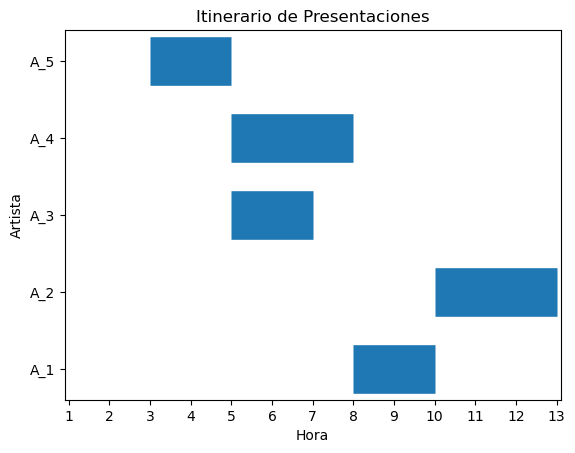

In [19]:
# Hora de inicio y hora de fin de cada artista.
comienzo = [sum(t * lp.value(x[i, t]) for t in H) for i in A]
fin = [comienzo[i] + d[f"A_{i + 1}"] for i in range(len(A))]

# Grafica de la solución
plt.hlines(A, comienzo, fin, linewidth=35)

# Etiqueta del eje x
plt.xlabel(xlabel="Hora")

# Etiqueta del eje y
plt.ylabel(ylabel="Artista")

# Título de la gráfica
plt.title("Itinerario de Presentaciones")

# Rango del eje x
plt.xlim([0.9, 13.1])

# Dígitos del eje x
plt.xticks(H + [13])

# Borde vacío al rededor de las barras
plt.margins(0.1)

## Créditos

Equipo Principios de Optimización<br>
Autores: Alejandro Mantilla, Ariadna De Ávila, Alfaima Solano<br>
Desarrollo: Alejandro Mantilla, Alfaima Solano<br>
Última fecha de modificación: 08/04/2023